## Collecting data

In [ ]:
import pandas as pd
import glob

In [ ]:
# combine csv's to one big csv
path = 'data/'
all_files = glob.glob(path + "*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))

from sklearn.utils import shuffle
df = shuffle(df)

df.to_csv('combined.csv', index=False)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.
c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.
c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:4: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


In [ ]:
all_data = pd.read_csv('combined.csv')

In [ ]:
pd.set_option('display.max_columns', len(all_data.columns)) # To view all columns
pd.set_option('display.max_rows', 120)

In [ ]:
all_data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,43425579,https://www.airbnb.com/rooms/43425579,20200610033538,2020-06-12,Beverly Grove Villa D,2 king Beds 3 Queen Beds additional bed can...,"Vaulted ceilings, gleaming hardwood floors, ne...",2 king Beds 3 Queen Beds additional bed can...,none,NaN,NaN,NaN,NaN,NaN,"No social gatherings, events or parties allowed.",NaN,NaN,https://a0.muscache.com/im/pictures/ebef8cab-5...,NaN,39937365,https://www.airbnb.com/users/show/39937365,Anixia,2015-07-29,"Miami, Florida, United States",NaN,within an hour,98%,72%,f,https://a0.muscache.com/im/users/39937365/prof...,https://a0.muscache.com/im/users/39937365/prof...,Laurel Canyon,8.0,8.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,t,"Los Angeles, CA, United States",Mid-Wilshire,Beverly Grove,City of Los Angeles,Los Angeles,CA,90048,Los Angeles,"Los Angeles, CA",US,United States,34.06928,-118.36871,t,Villa,Entire home/apt,12,5.5,5.0,5.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",NaN,$900.00,NaN,NaN,"$2,500.00",$400.00,8,$75.00,3,1125,3,3,1125,1125,3.0,1125.0,2 weeks ago,t,8,28,31,306,2020-06-12,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,HSR20-000823,"{""City of Los Angeles"","" CA""}",f,f,strict_14_with_grace_period,f,f,7,7,0,0,NaN
1,21695338,https://www.airbnb.com/rooms/21695338,20200707031313,2020-07-07,"Spacious, Bright & Cozy 1-bedroom in Greenpoint",I like to think of my place as a cozy escape. ...,"I like to call my place ""the penthouse"". It's ...",I like to think of my place as a cozy escape. ...,none,Greenpoint is my favorite neighborhood in Broo...,NaN,Steps from the G train and the B32 & B62 buses...,NaN,I will not be home. A key will be left in a lo...,- If you happen to chat with anyone in my buil...,NaN,NaN,https://a0.muscache.com/im/pictures/0e07b56c-f...,NaN,8652278,https://www.airbnb.com/users/show/8652278,Brady,2013-09-05,"New York, New York, United States",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/8652278/profi...,https://a0.muscache.com/im/users/8652278/profi...,Greenpoint,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Brooklyn, NY, United States",Brooklyn,Greenpoint,Brooklyn,Brooklyn,NY,11222,New York,"Brooklyn, NY",US,United States,40.73470,-73.95479,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Wi

In [ ]:
all_data.isna().sum()

id                                                   0
listing_url                                          0
scrape_id                                            0
last_scraped                                         0
name                                                27
summary                                           7684
space                                            47030
description                                       4412
experiences_offered                                  0
neighborhood_overview                            67191
notes                                           102419
transit                                          74322
access                                           86774
interaction                                      73544
house_rules                                      66337
thumbnail_url                                   209031
medium_url                                      209031
picture_url                                          0
xl_picture

## Data clean-up and exploration

In [ ]:
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
                   'host_id', 'host_url', 'host_name', 'host_location', 'host_thumbnail_url', 'host_picture_url', 'host_about', 'market', 
                   'host_neighbourhood', 'host_has_profile_pic', 'host_verifications', 'host_identity_verified', 'country_code', 'license', 
                   'jurisdiction_names', 'calendar_last_scraped', 'requires_license', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed',
                   'street', 'smart_location', 'host_since',
                   'host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'host_total_listings_count',
                   'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                   'calculated_host_listings_count_shared_rooms', 'zipcode', 'latitude', 'longitude', 
                   'country', 'is_location_exact', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
                   'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'host_has_profile_pic', 
                   'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'experiences_offered',
                   'host_is_superhost', 'host_listings_count', 'neighbourhood', 'property_type', 'bed_type', 'instant_bookable', 
                   'cancellation_policy', 'calendar_updated', 'host_response_time', 'cleaning_fee', 'name', 'summary', 'neighborhood_overview',
                   'notes', 'transit', 'access', 'interaction', 'house_rules', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 
                   'availability_90', 'number_of_reviews', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
                   'review_scores_communication', 'review_scores_location', 'review_scores_value', 'host_response_rate', 'amenities',
                   'availability_30', 'availability_60', 'availability_365', 'number_of_reviews_ltm', 'first_review', 'last_review', 
                   'reviews_per_month'
                  ]

airbnb = all_data.drop(columns_to_drop, axis=1)

In [ ]:
target = 'price'

one_hot_encode_features = ['room_type']

price_features = ['security_deposit', 'extra_people'] 

text_cols = ['space', 'description']

features = ['guests_included', 'minimum_nights', 'maximum_nights', 'review_scores_rating']

all_features = one_hot_encode_features + price_features + text_cols + features

In [ ]:
print(airbnb.shape)
airbnb.head(3)

(209031, 12)


,space,description,city,state,room_type,price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating
0,"Vaulted ceilings, gleaming hardwood floors, ne...",2 king Beds 3 Queen Beds additional bed can...,Los Angeles,CA,Entire home/apt,$900.00,"$2,500.00",8,$75.00,3,1125,NaN
1,"I like to call my place ""the penthouse"". It's ...",I like to think of my place as a cozy escape. ...,Brooklyn,NY,Entire home/apt,$87.00,$0.00,1,$0.00,4,1125,100.0
2,This room is one of two bedrooms open to book...,"Gorgeous, spacious, clean & cozy bedroom in th...",New York,NY,Private room,$100.00,$0.00,1,$25.00,2,25,96.0


In [ ]:
airbnb.dtypes

space                    object
description              object
city                     object
state                    object
room_type                object
price                    object
security_deposit         object
guests_included           int64
extra_people             object
minimum_nights            int64
maximum_nights            int64
review_scores_rating    float64
dtype: object

In [ ]:
airbnb.isna().sum()

space                   47030
description              4412
city                      159
state                      59
room_type                   0
price                       0
security_deposit        51757
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
review_scores_rating    45447
dtype: int64

In [ ]:
airbnb['security_deposit'].fillna(0, inplace=True)

In [ ]:
# Removing the $ sign from a string and converting to an integer

cols = ['security_deposit', 'extra_people','price']

airbnb[cols] = airbnb[cols].replace({'\$': '', ',': ''}, regex=True)

In [ ]:
airbnb['security_deposit'] = airbnb['security_deposit'].astype('Float64')
airbnb['extra_people'] = airbnb['extra_people'].astype('Float64')
airbnb['price'] = airbnb['price'].astype('Float64')

In [ ]:
airbnb.dtypes

space                    object
description              object
city                     object
state                    object
room_type                object
price                   float64
security_deposit        float64
guests_included           int64
extra_people            float64
minimum_nights            int64
maximum_nights            int64
review_scores_rating    float64
dtype: object

In [ ]:
airbnb.isna().sum()

space                   47030
description              4412
city                      159
state                      59
room_type                   0
price                       0
security_deposit            0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
review_scores_rating    45447
dtype: int64

In [ ]:
airbnb.dropna(inplace=True)

In [ ]:
airbnb.shape

(133961, 12)

In [ ]:
airbnb['state'].value_counts()

CA               45183
NY               27586
HI               15241
TX                6521
LA                5382
DC                5381
IL                5380
TN                5218
WA                4896
OR                3418
MN                3133
CO                3121
MA                2282
OH                1063
WI                  69
Hi                  20
Ca                  18
MD                   8
ca                   7
Ny                   7
La                   3
Il                   3
                     2
Tx                   2
California           1
Manhattan            1
Tn                   1
MP                   1
US                   1
VA                   1
Beverly Hills        1
Allston, Ma          1
加州                   1
Co                   1
Tennessee            1
Hi                   1
Wa                   1
Hawaii               1
NJ                   1
加利福尼亚                1
California           1
Name: state, dtype: int64

In [ ]:
airbnb['state'] = airbnb['state'].str.upper()

In [ ]:
filter_space = airbnb['state'] != ' '
airbnb = airbnb[filter_space]

In [ ]:
value_counts = airbnb['state'].value_counts()

to_remove = value_counts[value_counts <= 1].index

# Keep rows where the city column is not in to_remove
airbnb = airbnb[~airbnb.state.isin(to_remove)]

In [ ]:
airbnb['state'].value_counts()

CA    45208
NY    27593
HI    15261
TX     6523
LA     5385
IL     5383
DC     5381
TN     5219
WA     4897
OR     3418
MN     3133
CO     3122
MA     2282
OH     1063
WI       69
MD        8
Name: state, dtype: int64

In [ ]:
airbnb['city'].value_counts().count()

1186

In [ ]:
airbnb['city'] = airbnb['city'].str.upper()

In [ ]:
airbnb['city'].value_counts().count()

1077

In [ ]:
airbnb.isna().sum()

space                   0
description             0
city                    0
state                   0
room_type               0
price                   0
security_deposit        0
guests_included         0
extra_people            0
minimum_nights          0
maximum_nights          0
review_scores_rating    0
dtype: int64

In [ ]:
airbnb.describe()

,price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating
count,133945.000000,133945.000000,133945.000000,133945.000000,1.339450e+05,1.339450e+05,133945.000000
mean,215.441420,242.350860,2.138139,15.099123,7.546295e+02,3.430161e+04,95.218254
std,605.380655,497.337962,1.955282,25.891529,2.732352e+05,8.307288e+06,7.305016
min,0.000000,0.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,20.000000
25%,77.000000,0.000000,1.000000,0.000000,1.000000e+00,3.000000e+01,94.000000
50%,120.000000,100.000000,1.000000,6.000000,2.000000e+00,3.650000e+02,97.000000
75%,200.000000,300.000000,2.000000,25.000000,4.000000e+00,1.125000e+03,100.000000
max,24999.000000,5100.000000,36.000000,300.000000,1.000000e+08,2.147484e+09,100.000000


In [ ]:
airbnb.describe(exclude='number')

,space,description,city,state,room_type
count,133945,133945,133945,133945,133945
unique,122783,128443,1077,16,4
top,"At Zeus, we focus exclusively on 30 day+ stays...","Whether you're traveling or staying locally, w...",LOS ANGELES,CA,Entire home/apt
freq,647,185,11832,45208,93067


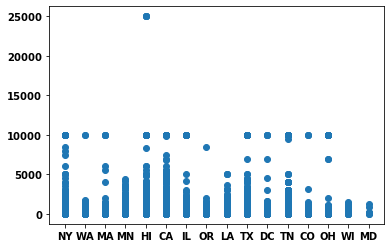

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(airbnb['state'], airbnb['price'])
plt.show()

In [ ]:
# remove price outlier
filter_price = airbnb['price'] < 10000
airbnb = airbnb[filter_price]

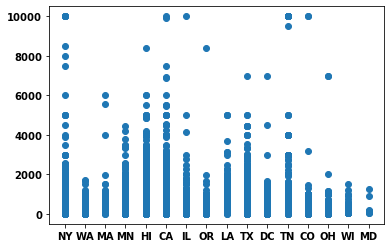

In [ ]:
plt.scatter(airbnb['state'], airbnb['price'])
plt.show()

In [ ]:
airbnb.describe()

,price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating
count,133585.000000,133585.000000,133585.000000,133585.000000,1.335850e+05,1.335850e+05,133585.000000
mean,188.623760,242.414178,2.139761,15.124093,7.566434e+02,3.439128e+04,95.235019
std,305.323338,497.092634,1.955921,25.890935,2.736032e+05,8.318474e+06,7.276353
min,0.000000,0.000000,1.000000,0.000000,1.000000e+00,1.000000e+00,20.000000
25%,77.000000,0.000000,1.000000,0.000000,1.000000e+00,3.000000e+01,94.000000
50%,120.000000,100.000000,1.000000,7.000000,2.000000e+00,3.650000e+02,97.000000
75%,200.000000,300.000000,2.000000,25.000000,5.000000e+00,1.125000e+03,100.000000
max,9999.000000,5100.000000,36.000000,300.000000,1.000000e+08,2.147484e+09,100.000000


airbnb.to_csv('cleaned_airbnb.csv', index=False)